In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/c/mooc-dropout-prediction-17/data

In [3]:
data = pd.read_csv('MOOC_Visual.csv', parse_dates=['startdate', 'enddate'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72325 entries, 0 to 72324
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   enrollment_id     72325 non-null  int64         
 1   startdate         72325 non-null  datetime64[ns]
 2   enddate           72325 non-null  datetime64[ns]
 3   access            72325 non-null  int64         
 4   discussion        72325 non-null  int64         
 5   navigate          72325 non-null  int64         
 6   page_close        72325 non-null  int64         
 7   problem           72325 non-null  int64         
 8   video             72325 non-null  int64         
 9   wiki              72325 non-null  int64         
 10  proccess_period   72325 non-null  float64       
 11  present_days      72325 non-null  int64         
 12  effective_time    72325 non-null  float64       
 13  Friday            72325 non-null  int64         
 14  Monday            7232

In [5]:
data.isnull().sum()

enrollment_id       0
startdate           0
enddate             0
access              0
discussion          0
navigate            0
page_close          0
problem             0
video               0
wiki                0
proccess_period     0
present_days        0
effective_time      0
Friday              0
Monday              0
Saturday            0
Sunday              0
Thursday            0
Tuesday             0
Wednesday           0
holidays            0
course_enroll       0
user_enroll         0
course_drop_rate    0
dropout_prob        0
dtype: int64

In [6]:
data.describe()

,enrollment_id,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,present_days,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
count,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000,...,72325.000000,72325.000000,72325.000000,72325.000000,72325.00000,72325.000000,72325.000000,72325.000000,72325.000000,72325.000000
mean,36163.000000,25.707045,5.247992,8.330052,10.182966,10.446429,6.566678,0.741652,5.790234,2.662067,...,0.328033,0.343173,0.394940,0.409139,0.39870,0.095099,5618.856772,2.460242,0.793640,0.793640
std,20878.573447,54.679282,28.351693,12.641069,20.552585,34.335217,14.662946,3.503804,8.966359,3.093727,...,0.627570,0.649591,0.693014,0.711455,0.68801,0.293918,3686.987244,2.381182,0.066570,0.404695
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,645.000000,1.000000,0.666866,0.000000
25%,18082.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.001204,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2151.000000,1.000000,0.763524,1.000000
50%,36163.000000,6.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.000000,0.045914,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4684.000000,2.000000,0.799671,1.000000
75%,54244.000000,26.000000,2.000000,10.000000,9.000000,6.000000,6.000000,1.000000,9.932766,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,9382.000000,3.000000,0.836914,1.000000
max,72325.000000,3659.000000,1930.000000,409.000000,413.000000,1014.000000,536.000000,243.000000,29.987014,30.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,2.000000,12004.000000,27.000000,0.938356,1.000000


In [7]:
data.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
2,3,2014-06-04,2014-06-08,34,1,6,7,0,9,0,...,1,1,1,0,1,0,3005,2,0.868481,0
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1


In [8]:
data['dropout_prob'].value_counts()

1    57400
0    14925
Name: dropout_prob, dtype: int64

#seems dataset is not balance

(array([7.21e+04, 2.14e+02, 4.00e+00, 5.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([   0. ,  365.9,  731.8, 1097.7, 1463.6, 1829.5, 2195.4, 2561.3,
        2927.2, 3293.1, 3659. ]),
 <a list of 10 Patch objects>)

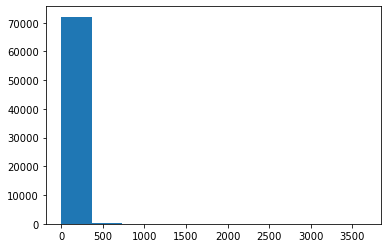

In [9]:
plt.hist(data['access'])

In [10]:
data['access'].value_counts()

0       17485
2        6397
3        4002
4        3117
5        2803
        ...  
3659        1
416         1
1438        1
669         1
447         1
Name: access, Length: 511, dtype: int64

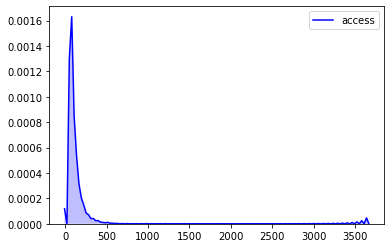

In [11]:
sns.kdeplot(data['access'], color='b', shade=True)

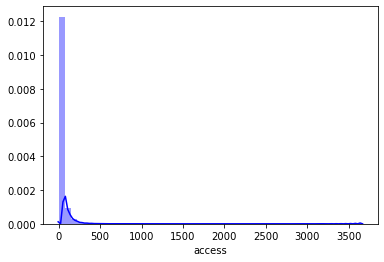

In [12]:
sns.distplot(data['access'], color='b', kde=True)

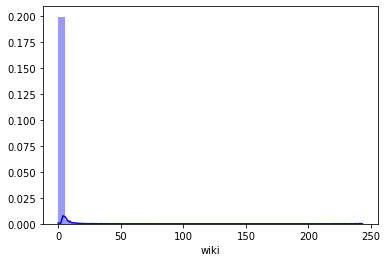

In [13]:
sns.distplot(data['wiki'], color='b', kde=True)

In [14]:
data['wiki'].value_counts()

0      53589
1      10299
2       3575
3       1707
4        937
       ...  
52         1
243        1
175        1
113        1
127        1
Name: wiki, Length: 84, dtype: int64

In [15]:
col = data.columns

In [16]:
col.size

25

In [17]:
col

Index(['enrollment_id', 'startdate', 'enddate', 'access', 'discussion',
       'navigate', 'page_close', 'problem', 'video', 'wiki', 'proccess_period',
       'present_days', 'effective_time', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'holidays',
       'course_enroll', 'user_enroll', 'course_drop_rate', 'dropout_prob'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


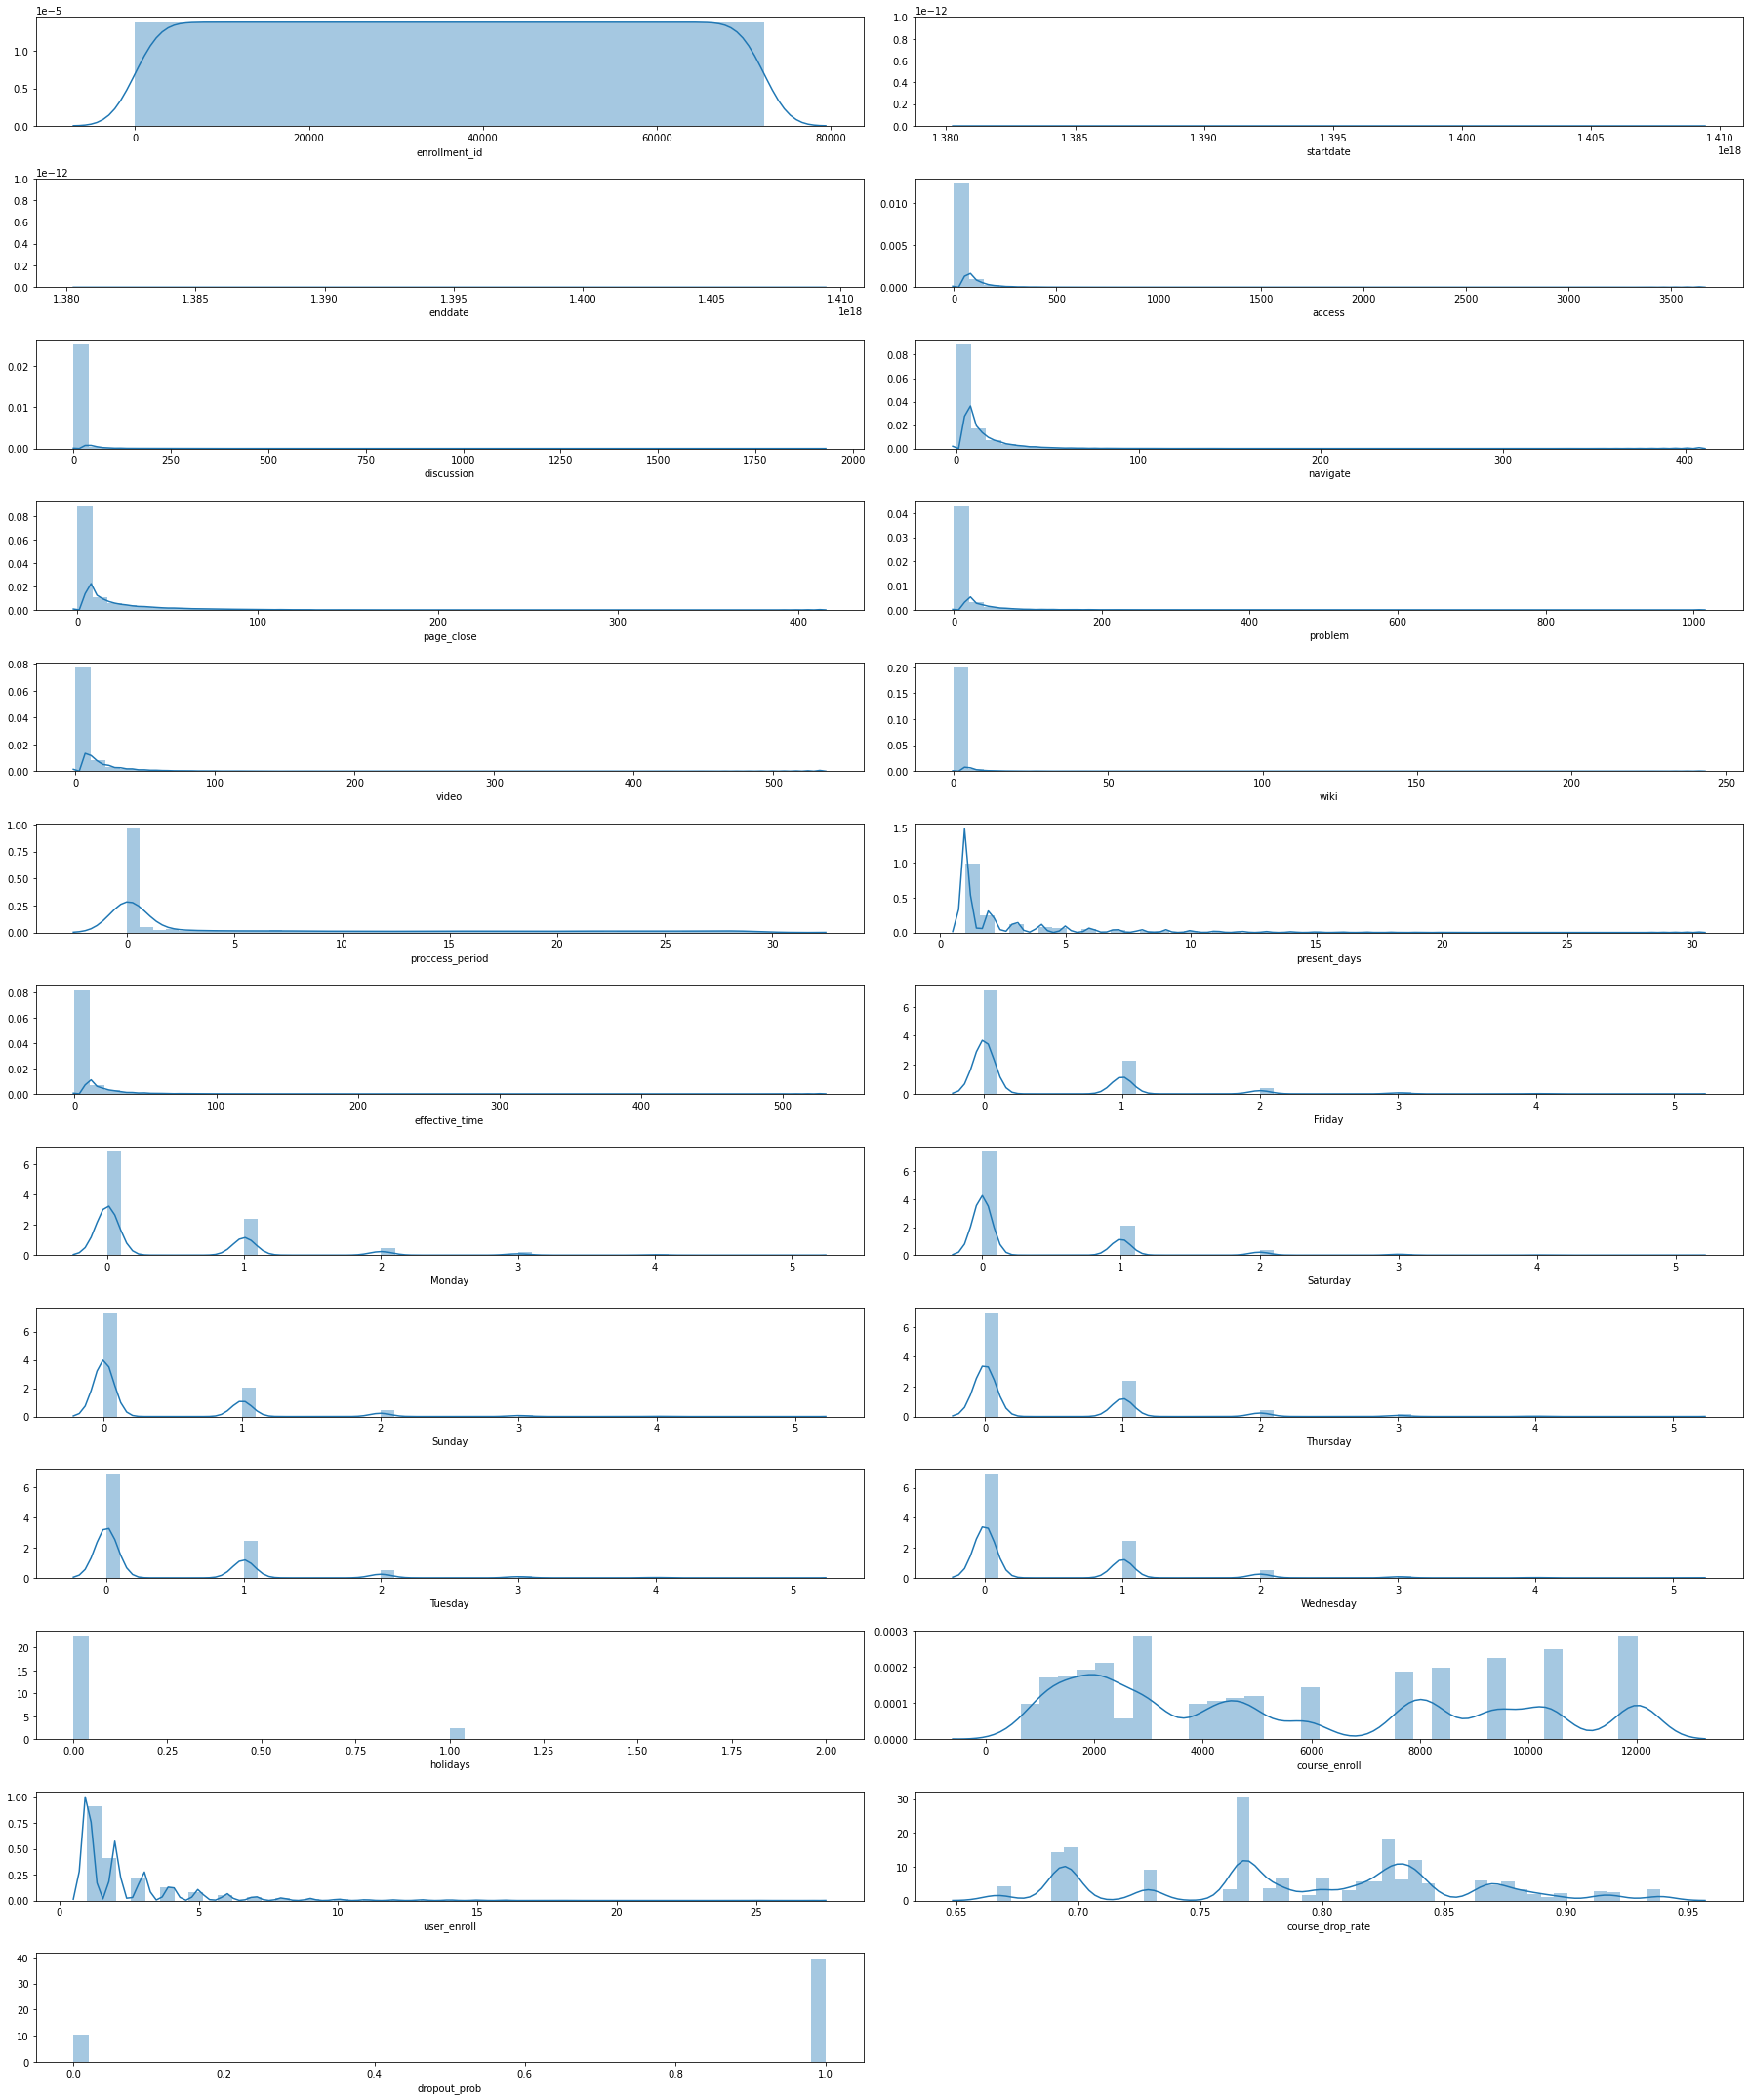

In [18]:
plt.figure(figsize=(25,30))
plotno=1

for i in col:
    plt.subplot(13,2,plotno)
    sns.distplot(data[i])
    plotno +=1
    plt.tight_layout()


In [19]:
data[data['dropout_prob']==1].shape

(57400, 25)

In [20]:
data[data['dropout_prob']==0].shape

(14925, 25)

In [21]:
dropout_prob_majority = data[data['dropout_prob']==1]

In [22]:
dropout_prob_majority.shape

(57400, 25)

In [23]:
dropout_prob_minority = data[data['dropout_prob']==0]

In [24]:
dropout_prob_minority.shape

(14925, 25)

# balancing Data set using upsampling

In [25]:
from sklearn.utils import resample

In [26]:
dropout_prob_minority_balanced = resample(dropout_prob_minority, replace=True, n_samples=dropout_prob_majority.shape[0])

In [27]:
dropout_prob_minority_balanced

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
33270,33271,2013-11-28,2013-12-08,58,1,5,25,40,33,0,...,0,1,1,0,1,1,973,2,0.915194,0
918,919,2014-06-03,2014-06-21,38,0,7,23,10,12,0,...,1,0,1,2,0,0,5890,2,0.728608,0
32273,32274,2014-05-26,2014-06-23,121,0,20,92,21,37,0,...,2,1,1,3,0,1,2796,1,0.666866,0
70920,70921,2014-06-01,2014-06-24,99,19,6,89,24,44,0,...,0,2,1,2,1,0,2796,1,0.666866,0
28101,28102,2014-05-31,2014-06-22,115,66,22,47,42,19,1,...,2,1,1,2,1,0,5890,2,0.728608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,730,2013-12-17,2014-01-09,83,21,30,37,0,34,3,...,0,1,1,2,3,1,1430,3,0.895417,0
41975,41976,2014-05-28,2014-06-01,22,3,2,1,0,1,0,...,0,1,0,0,1,0,1038,5,0.797054,0
61832,61833,2014-06-21,2014-06-21,3,0,2,2,2,1,0,...,1,0,0,0,0,0,8223,1,0.767759,0
486,487,2013-12-12,2014-01-09,68,71,60,29,0,3,2,...,2,2,4,2,1,1,12004,15,0.768745,0


In [28]:
data_balanced = pd.concat([dropout_prob_majority, dropout_prob_minority_balanced])

In [29]:
data_balanced.head()

,enrollment_id,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate,dropout_prob
0,1,2014-05-31,2014-06-01,27,0,8,0,79,0,0,...,1,1,0,0,0,0,4684,1,0.826534,1
1,2,2014-06-04,2014-06-04,7,4,3,4,0,3,1,...,0,0,0,0,1,0,7775,1,0.836914,1
3,4,2014-06-12,2014-06-13,54,4,6,46,21,31,1,...,0,0,1,0,0,0,2981,2,0.799671,1
4,5,2014-07-01,2014-07-01,0,0,2,0,0,0,0,...,0,0,0,1,0,0,10322,1,0.695925,1
5,6,2014-07-16,2014-07-16,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1481,2,0.823991,1


In [30]:
data_balanced.shape

(114800, 25)

In [31]:
# using PCA for component analysis

In [32]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [62]:
X = data_balanced.drop(['dropout_prob', 'enrollment_id'], axis=1)

In [63]:
y = data_balanced['dropout_prob']

In [64]:
X['startdate'] = X['startdate'].map(datetime.datetime.toordinal)

In [65]:
X['enddate'] = X['enddate'].map(datetime.datetime.toordinal)

In [66]:
X.head()

,startdate,enddate,access,discussion,navigate,page_close,problem,video,wiki,proccess_period,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,holidays,course_enroll,user_enroll,course_drop_rate
0,735384,735385,27,0,8,0,79,0,0,1.053588,...,0,1,1,0,0,0,0,4684,1,0.826534
1,735388,735388,7,4,3,4,0,3,1,0.016782,...,0,0,0,0,0,1,0,7775,1,0.836914
3,735396,735397,54,4,6,46,21,31,1,0.766829,...,0,0,0,1,0,0,0,2981,2,0.799671
4,735415,735415,0,0,2,0,0,0,0,0.000150,...,0,0,0,0,1,0,0,10322,1,0.695925
5,735430,735430,0,0,1,0,0,0,0,0.000000,...,0,0,0,0,0,1,0,1481,2,0.823991


In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
st = StandardScaler()

In [69]:
X = st.fit_transform(X)

In [70]:
X

array([[ 0.63350204,  0.54178329, -0.22734818, ..., -0.32607143,
        -0.62535642,  0.60988128],
       [ 0.67860019,  0.57569367, -0.5002636 , ...,  0.50791735,
        -0.62535642,  0.7661997 ],
       [ 0.76879649,  0.67742481,  0.14108765, ..., -0.78556121,
        -0.24271438,  0.20533745],
       ...,
       [ 0.87026733,  0.76785249, -0.55484669, ...,  0.62879312,
        -0.62535642, -0.27522747],
       [-1.28316938, -1.07461145,  0.33212845, ...,  1.64895216,
         4.73163213, -0.26038318],
       [ 0.55458027,  0.73394211,  1.28733244, ..., -0.42779054,
         0.5225697 , -0.05185386]])

In [71]:
pca = PCA()

In [72]:
pca.fit(X)

PCA()

In [73]:
pca.explained_variance_ratio_

array([3.92798940e-01, 9.38888660e-02, 7.05525949e-02, 5.06163662e-02,
       4.58269293e-02, 3.98528049e-02, 3.39573845e-02, 3.33370023e-02,
       3.14155182e-02, 3.07060235e-02, 2.49546140e-02, 2.35220035e-02,
       2.20246220e-02, 2.11498088e-02, 2.01971996e-02, 1.60121172e-02,
       1.45063565e-02, 1.16384528e-02, 8.74129592e-03, 7.99436648e-03,
       6.30661349e-03, 1.19751721e-07, 6.35318308e-33])

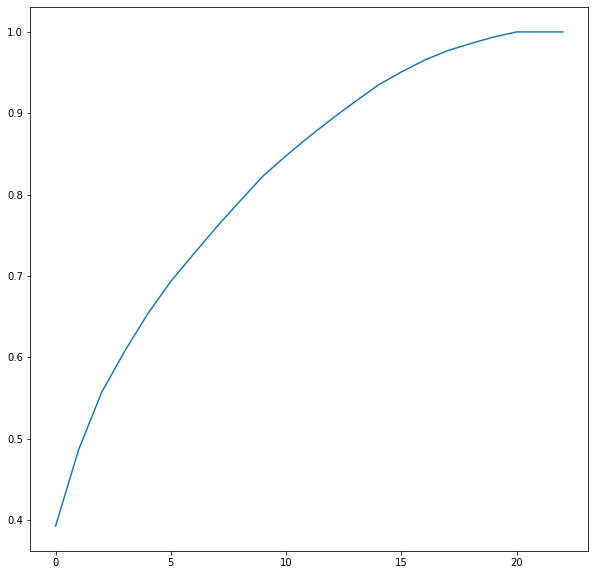

In [74]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum())

# we can see that 19-20 feature can explain our 99% data

In [75]:
pca = PCA(n_components=19)

In [76]:
X = pca.fit_transform(X)

In [77]:
X

array([[-1.30587039,  1.0840723 ,  0.18430143, ...,  0.04845252,
         0.14141919, -0.15558417],
       [-2.12001313,  0.6185246 , -0.34958528, ..., -0.64115108,
        -0.07031144, -0.056455  ],
       [-0.62765007,  1.21201861,  0.20188084, ...,  0.17582607,
        -0.2131529 , -0.52133431],
       ...,
       [-2.1745834 ,  0.51612803, -1.20705229, ..., -0.15464071,
        -0.061038  , -0.11367449],
       [ 6.57854693, -1.23778303,  0.18674201, ..., -0.47284153,
         0.83613506, -0.04311479],
       [ 3.97974987,  1.33940541,  0.20700167, ...,  0.06223862,
        -0.04579106,  0.08640652]])

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt = DecisionTreeClassifier()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

In [86]:
fold = KFold(n_splits=10, shuffle=True, random_state=101)

In [88]:
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=50)

In [90]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [91]:
y_pred = ada.predict(X_test)

In [1]:
# let use GridSearchCV for hyper param tuning



In [97]:
param_grid = {'n_estimators': range(1,100,3)}

In [99]:
param_grid

{'n_estimators': range(1, 100, 3)}

In [100]:
ada_opt = AdaBoostClassifier(dt)

In [101]:
gridSearch_cv = GridSearchCV(ada_opt, param_grid=param_grid, verbose=3, cv=fold, n_jobs=-1, return_train_score=True)

In [102]:
# gridSearch_cv.fit(X_train, y_train)

Fitting 10 folds for each of 33 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 153.4min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 221.8min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1, param_grid={'n_estimators': range(1, 100, 3)},
             return_train_score=True, verbose=3)

In [103]:
gridSearch_cv.best_params_

{'n_estimators': 73}

In [104]:
gridSearch_cv.best_score_ 

0.9309980089596814

In [105]:
result = pd.DataFrame(gridSearch_cv.cv_results_)

In [106]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,8.198321,0.218304,0.017666,0.005305,1,{'n_estimators': 1},0.884520,0.901319,0.890991,0.899701,...,0.995949,0.996032,0.996004,0.995893,0.995921,0.996004,0.996211,0.996004,0.996003,0.000085
1,38.214720,6.110639,0.036043,0.003598,4,{'n_estimators': 4},0.893604,0.907043,0.902812,0.897710,...,0.995949,0.996032,0.996004,0.995893,0.995921,0.996004,0.996211,0.996004,0.996003,0.000085
2,65.025766,11.171543,0.056742,0.006370,7,{'n_estimators': 7},0.908039,0.913639,0.913016,0.931309,...,0.995949,0.996032,0.996004,0.995893,0.995921,0.996004,0.996211,0.996004,0.996003,0.000085
3,83.767488,14.202079,0.076525,0.010468,10,{'n_estimators': 10},0.906421,0.921354,0.918741,0.931931,...,0.995949,0.996032,0.996004,0.995893,0.995921,0.996004,0.996211,0.996004,0.996003,0.000085
4,88.852421,24.109870,0.088665,0.014574,13,{'n_estimators': 13},0.904181,0.919487,0.921229,0.920234,...,0.995949,0.996032,0.996004,0.995893,0.995921,0.996004,0.996211,0.996004,0.996003,0.000085


In [141]:
#Visualise the CV result

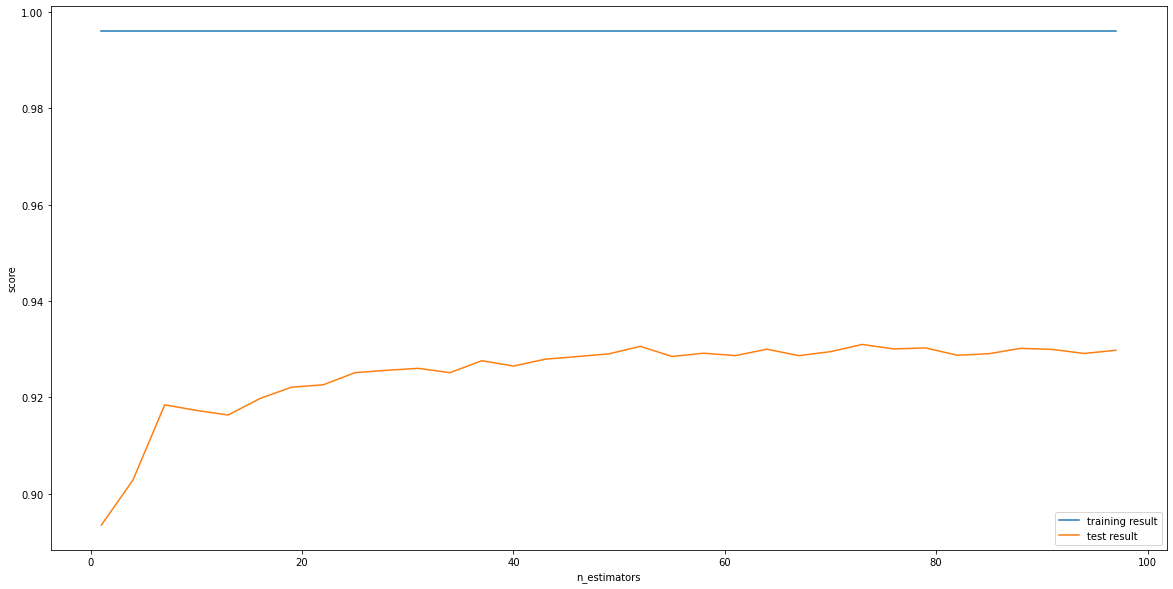

In [107]:
plt.figure(figsize=(20,10))
plt.plot(result['param_n_estimators'], result['mean_train_score'], label='training result')
plt.plot(result['param_n_estimators'], result['mean_test_score'], label='test result')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()

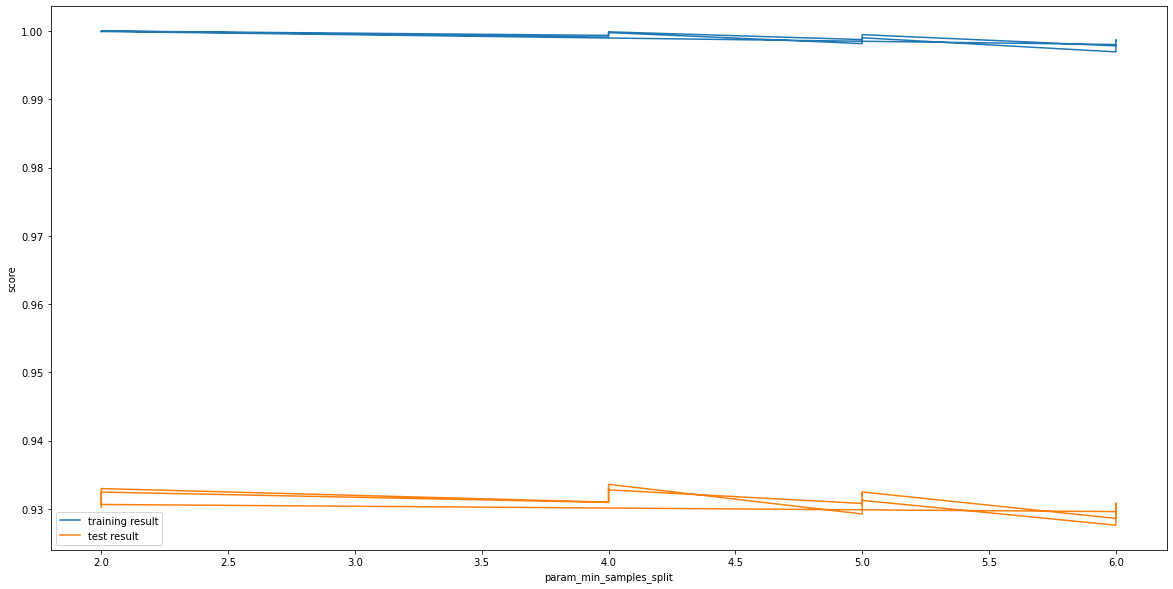

In [139]:
plt.figure(figsize=(20,10))
plt.plot(result['param_min_samples_split'], result['mean_train_score'], label='training result')
plt.plot(result['param_min_samples_split'], result['mean_test_score'], label='test result')
plt.xlabel('param_min_samples_split')
plt.ylabel('score')
plt.legend()

In [108]:
gridSearch_cv.best_params_

{'n_estimators': 73}

In [109]:
ada_final = AdaBoostClassifier(base_estimator=dt, n_estimators=73)

In [110]:
ada_final.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=73)

In [121]:
y_pred = ada_final.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [123]:
print(confusion_matrix(y_test, y_pred))

[[16529   630]
 [ 1501 15780]]


In [124]:
print(accuracy_score(y_test, y_pred))

0.9381242740998839


In [125]:
print(f1_score(y_test, y_pred))

0.9367486865928586


In [126]:
y_pred_train = ada_final.predict(X_train)

In [127]:
print(accuracy_score(y_train, y_pred_train))

0.9959059233449478


In [128]:
print(f1_score(y_train, y_pred_train))

0.9959045473217731


In [120]:
print(confusion_matrix(y_pred_train, y_train))

[[40029   117]
 [  212 40002]]
